## Inferenz für zwei Grundgesamtheitsmittelwerte unter Verwendung gepaarter Stichproben
----------------------------------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import t
from scipy import stats
import scipy.stats
import statsmodels.api as smi
import pylab

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Wenden wir uns nun einem Hypothesentestverfahren für die Differenz zwischen zwei Grundgesamtheitsmittelwerte zu, wenn die Stichproben **abhängig** sind. Wenn beispielsweise zwei Datenwerte aus derselben Quelle (oder demselben Teilsystem) stammen, werden diese als **gepaarte** oder **übereinstimmende** Stichproben bezeichnet.

Sehr häufig werden diese Verfahren für die **Before-After-Control-Impact (BACI)** eingesetzt. Stellen Sie sich einen Fall vor, in dem Sie die Wirksamkeit eines Filtersystems zur Entfernung von Luftschadstoffen, die von einer Fabrik freigesetzt werden, bewerten sollen. In diesem Fall besteht eine Grundgesamtheit aus Messungen der Luftqualität vor der Einführung oder Erneuerung des Filtersystems und die andere Grundgesamtheit aus Messungen der Luftqualität nach der Installation des neuen Filtersystems. In diesem Fall hat man es mit gepaarten Stichproben zu tun, da die beiden Datensätze von derselben Quelle, der Fabrik, erhoben werden.

Bei gepaarten Stichproben wird die Differenz zwischen den Datenwerten der beiden Stichproben mit $d$ bezeichnet, oft auch als **gepaarte Differenz** bezeichnet. Beachten Sie, dass der Stichprobenumfang $n$ für jede Stichprobe gleich ist. Der Mittelwert der gepaarten Differenzen für die Stichproben wird als $\bar d$ bezeichnet.

$$\bar d = \frac{\sum d}{n}$$

Die Standardabweichung der gepaarten Unterschiede für zwei Stichproben, $s_d$, wird wie folgt berechnet

$$s_d = \sqrt{\frac{\sum d^2 - \frac{(\sum d)^2}{n}}{n-1}}$$

Angenommen, die gepaarte Differenzvariable $d$ ist normalverteilt, dann wird die gepaarte $t$-Statistik wie folgt ausgedrückt

$$t= \frac{\bar d - (\mu_1-\mu_2)}{\frac{s_d}{\sqrt{n}}}\text{,}$$

was sich vereinfacht zu

$$t= \frac{\bar d}{\frac{s_d}{\sqrt{n}}}\text{,}$$

wenn $\mu_1-\mu_2 = 0$. Die Teststatistik $t$ für gepaarte Stichproben folgt einer $t$-Verteilung mit $df=n-1$.

### Intervall-Schätzung von $\mu_d$

Das $100(1-\alpha)\%$-Konfidenzintervall für $\mu_d$ ist

$$\bar d \pm t \times \frac{s_d}{\sqrt{n}}$$

wobei sich der Wert von $t$ aus der $t$-Verteilung für das gegebene Konfidenzniveau und $n-1$ Freiheitsgrade ergibt.

### Der gepaarte $t$-Test: Ein Beispiel

Um praktische Erfahrungen zu sammeln, wenden wir den gepaarten $t$-Test mit einer Standardabweichung in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [2]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary.*

Um den gepaarten $t$-Test für abhängige Stichproben zu veranschaulichen, **interessieren wir uns für die Frage, ob ein Online-Tutorium zum Erlernen von Statistik den Studenten hilft, ihre Noten zu verbessern**. Es gibt drei Variablen im Datensatz der Studenten, die von Interesse sind. Die Variable `online.tutorial` ist eine binäre Variable, die den Wert $1$ annimmt, wenn der Student das Online-Tutorium zum Thema Statistik absolviert hat, und ansonsten den Wert $0$. Die Variablen `score1` und `score2` geben die Noten ($0-100$) für zwei Klausuren in Mathematik und Statistik an. Je höher der Wert ist, desto besser hat der jeweilige Studierende abgeschnitten. Bitte beachten Sie, dass die erste Prüfung stattfindet, bevor die Studierenden das Online-Tutorium zum Thema Statistik besucht haben. Die Teilnahme am Online-Tutorium zur Statistik ist nicht verpflichtend, die beiden Prüfungen sind jedoch für alle Studierenden obligatorisch. Die erste Prüfung (`score1`) findet zu Beginn des $3$. Semesters statt, die zweite Prüfung (`score2`) am Ende des $3$. Semesters.

Im Wesentlichen sind zwei Forschungsfragen von Interesse. **Erstens wollen wir untersuchen, ob die Gruppe der Studierenden, die das Online-Tutorial zum Statistiklernen besucht hat, in der zweiten Prüfung besser abschneidet als in den ersten Prüfungen. Zweitens wird untersucht, wie die Gruppe der Studierenden, die nicht am Online-Tutorium für Statistik teilgenommen hat, bei beiden Prüfungen abgeschnitten hat.**

### Vorbereitung der Daten

Wir beginnen mit der ersten Forschungsfrage und konzentrieren uns auf die Studierenden, die das Online-Tutorial zum Thema Statistik besucht haben.

Für die Datenaufbereitung unterteilen wir den Datensatz anhand der Variable `online.tutorial`, die angibt, ob der Studierende das Tutorium besucht hat oder nicht ($1$=ja, $0$=nein). Dann ziehen wir eine Zufallsstichprobe von $65$ Studenten aus dem Datensatz und extrahieren die beiden Variablen von Interesse, `score1` und `score2`. Wir speichern jede von ihnen in einem Vektor mit den Namen `score1_sample` und `score2_sample`.

In [3]:
tutorial = students.loc[students['online.tutorial']==1]
n = 65
score1_sample = tutorial['score1'].sample(n, random_state=1)
score2_sample = tutorial['score2'].sample(n, random_state=1)

Nun berechnen wir die gepaarten Differenzen, $d$, und stellen sie dar.

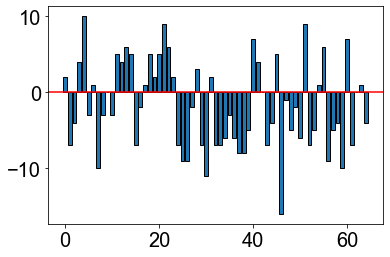

In [4]:
d = (score1_sample - score2_sample)
x = np.arange(n)
fig = plt.figure()
plt.axhline(y=0, color='r')
plt.bar(x,d,edgecolor = 'k')
plt.show()

Das Diagramm sieht wie erwartet aus. Einige Studierende schneiden in der ersten Prüfung besser ab als in der zweiten Prüfung und umgekehrt.

Um die Normalverteilungsannahme zu überprüfen, stützen wir uns wiederum auf eine visuelle Inspektion eines Q-Q-Plots. Wenn die Variable normalverteilt ist, sollte das Q-Q-Diagramm ungefähr linear sein. In Python können wir die Funktion `qqplot()` verwenden, um Q-Q-Plots zu erstellen.

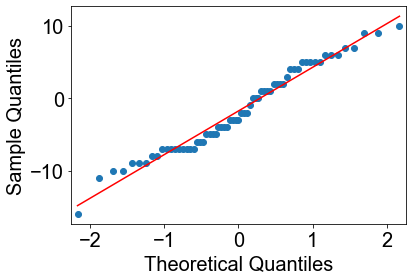

In [5]:
# Erzeuge Q-Q Plot
smi.qqplot(d, line = "r")
pylab.show()

Die Daten sind nicht sehr genau und etwas verrauscht, aber sie scheinen ungefähr normalverteilt zu sein.

Wir berechnen weiter $\bar d$ den Mittelwert der gepaarten Differenzen

$$\bar d = \frac{\sum d}{n}\text{,}$$

und $s_d$, die Standardabweichung der gepaarten Unterschiede für zwei Stichproben

$$s_d = \sqrt{\frac{\sum d^2 - \frac{(\sum d)^2}{n}}{n-1}}\text{.}$$

In [6]:
#paired difference
d_bar = sum(d)/len(d)

#standard deviation
s_d = np.sqrt((sum(d**2)-(sum(d)**2/len(d)))/(n-1))

### Überprüfung der Hypothesen

Jetzt sind wir bereit, den **gepaarten $t$-Test** anzuwenden. Erinnern Sie sich an unsere erste Forschungsfrage: **Lassen die Daten den Schluss zu, dass sich die durchschnittlichen Prüfungsergebnisse verbessern, wenn die Studierenden ein Online-Tutorial zum Thema Statistik besuchen?**

Wir folgen dem schrittweisen Implementierungsverfahren für Hypothesentests.

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass es keinen Unterschied im Mittelwert der Prüfungsnoten der einen Prüfung im Vergleich zur anderen gibt.

$$H_0: \quad \mu_1 = \mu_2$$

Erinnern Sie sich daran, dass die Formulierung der Alternativhypothese vorgibt, ob wir einen zweiseitigen, einen links- oder einen rechtsseitigen Hypothesentest durchführen.

**Alternative Hypothese**

$$H_A: \quad \mu_1 < \mu_2$$

Diese Formulierung führt zu einem linksseitigen Hypothesentest und besagt, dass die Studenten im Durchschnitt bei der zweiten Prüfung besser abschneiden.

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0.05$$

In [7]:
alpha = 0.05

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die obige Gleichungsform:

$$t= \frac{\bar d - (\mu_1-\mu_2)}{\frac{s_d}{\sqrt{n}}}$$

Wenn $H_0$ wahr ist, dann ist $μ_1-μ_2=0$ und somit vereinfacht sich die Gleichung zu

$$t= \frac{\bar d}{\frac{s_d}{\sqrt{n}}}\text{.}$$

In [8]:
# Compute the value of the test statistic

#paired difference
d_bar = sum(d)/len(d)

#standard deviation
s_d = np.sqrt((sum(d**2)-(sum(d)**2/len(d)))/(n-1))

#test statistic
tw = d_bar/(s_d/np.sqrt(len(d)))
tw

-2.4227231184673745

Der numerische Wert der Teststatistik ist $-2,422723$.

Um den $p$-Wert zu berechnen, wenden wir die Funktion `t.cdf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet.

$$df = n - 1= 64$$

In [9]:
# Compute the p-value
df = len(d) - 1
p = t.cdf(tw, df = df)
p

0.009122595661033036

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [10]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,05$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $5 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=0,009123$. Bei einem Signifikanzniveau von $5 \%$ lassen die Daten den Schluss zu, dass sich die Prüfungsnoten der Studierenden nach der Teilnahme an einem Online-Tutorium für Statistik verbessern.

### Hypothesentests in Python

Wir haben soeben manuell einen gepaarten $t$-Test in Python durchgeführt. Das ist gut, aber jetzt nutzen wir die ganze Macht von Python, um das gleiche Ergebnis wie oben mit nur einer Zeile Code zu erhalten!

Um einen gepaarten $t$-Test in Python durchzuführen, verwenden wir die Funktion `ttest_rel()`. Wir geben zwei Vektoren als Dateneingabe an und wir setzen das Argument `alternative` auf `alternative = 'less'`, um auf $HA:\mu_1 \lt \mu_2$ zu testen

In [11]:
stats.ttest_rel(score1_sample,score2_sample,alternative='less')

Ttest_relResult(statistic=-2.4227231184673745, pvalue=0.009122595661033036)

Großartig! Vergleichen Sie die Ausgabe der Funktion `ttest_rel()` mit unserem Ergebnis von oben. Sie stimmen perfekt überein! Auch hier können wir schlussfolgern, dass die Daten bei einem Signifikanzniveau von $5 \%$ einen sehr starken Hinweis darauf liefern, dass sich die Prüfungsnoten der Studenten nach der Teilnahme an einem Online-Tutorium für Statistik verbessern.

Bevor wir fortfahren, muss noch eine Forschungsfrage beantwortet werden. Was ist, wenn es andere Gründe für die besseren Noten in der zweiten Prüfung gibt? Was ist, wenn die zweite Prüfung viel einfacher war? Was wäre, wenn die Studenten einen tollen Dozenten hatten und sich dadurch im Laufe des Semesters verbessert haben? Wir testen diese Hypothese, indem wir einen gepaarten $t$-Test durchführen, und zwar explizit für die Studierenden, die nicht am Online-Tutorium für Statistik teilgenommen haben. Da wir mit der Python-Maschinerie bestens vertraut sind, führen wir einen gepaarten $t$-Test mit nur wenigen Zeilen Code durch.

In [12]:
no_tutorial = students.loc[students['online.tutorial']==0]

n = 65

score1_no_tutorial = no_tutorial['score1'].sample(n, random_state=1)
score2_no_tutorial = no_tutorial['score2'].sample(n, random_state=1)

# conduct paired t-test
statistics,pvalue=stats.ttest_rel(score1_no_tutorial, score2_no_tutorial, nan_policy = 'omit', alternative = 'less')
stats.ttest_rel(score1_no_tutorial, score2_no_tutorial, nan_policy = 'omit', alternative = 'less')

Ttest_relResult(statistic=2.1307181194375913, pvalue=0.9771439852770387)

In [13]:
pvalue <= alpha

False

Der $p$-Wert ist größer als das angegebene Signifikanzniveau von $0,05$; wir verwerfen $H_0$ nicht. Die Testergebnisse sind auf dem $5 \%$-Niveau statistisch signifikant und liefern keinen ausreichenden Beweis gegen die Nullhypothese.

Bei einem Signifikanzniveau von $5 \%$ liefern die Daten keine ausreichende Evidenz für die Schlussfolgerung, dass sich die Prüfungsnoten der Studierenden, die nicht am Online-Tutorium teilgenommen haben, verbessert haben.